# Moore's law is the observation that the number of transistors in a dense integrated circuit (IC) doubles about every two years

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

In [36]:
data=pd.read_csv('moore.csv',header=None).values
X=data[:,0].reshape(-1,1)#make X a 2-D array
Y=data[:,1]
X

array([[1971],
       [1972],
       [1973],
       [1973],
       [1974],
       [1974],
       [1974],
       [1975],
       [1976],
       [1976],
       [1976],
       [1978],
       [1978],
       [1979],
       [1979],
       [1979],
       [1981],
       [1982],
       [1982],
       [1983],
       [1984],
       [1984],
       [1985],
       [1985],
       [1985],
       [1986],
       [1986],
       [1986],
       [1987],
       [1987],
       [1987],
       [1987],
       [1988],
       [1988],
       [1989],
       [1989],
       [1989],
       [1989],
       [1990],
       [1991],
       [1991],
       [1992],
       [1992],
       [1993],
       [1993],
       [1994],
       [1994],
       [1995],
       [1999],
       [1995],
       [1996],
       [1997],
       [1997],
       [1997],
       [1998],
       [1999],
       [1999],
       [2000],
       [2000],
       [1999],
       [1999],
       [1999],
       [2000],
       [2001],
       [2001],
       [2002],
       [20

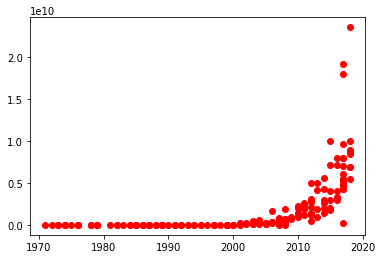

In [37]:
plt.scatter(X,Y,color='red')

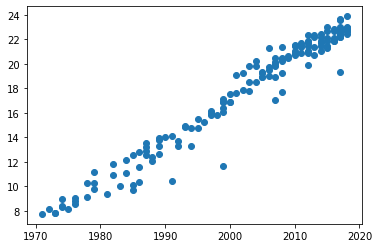

In [38]:
# lets make this data linear
Y=np.log(Y)
plt.scatter(X,Y)

In [39]:
#scaling
X=X-np.mean(X)
X

array([[-31.19753086],
       [-30.19753086],
       [-29.19753086],
       [-29.19753086],
       [-28.19753086],
       [-28.19753086],
       [-28.19753086],
       [-27.19753086],
       [-26.19753086],
       [-26.19753086],
       [-26.19753086],
       [-24.19753086],
       [-24.19753086],
       [-23.19753086],
       [-23.19753086],
       [-23.19753086],
       [-21.19753086],
       [-20.19753086],
       [-20.19753086],
       [-19.19753086],
       [-18.19753086],
       [-18.19753086],
       [-17.19753086],
       [-17.19753086],
       [-17.19753086],
       [-16.19753086],
       [-16.19753086],
       [-16.19753086],
       [-15.19753086],
       [-15.19753086],
       [-15.19753086],
       [-15.19753086],
       [-14.19753086],
       [-14.19753086],
       [-13.19753086],
       [-13.19753086],
       [-13.19753086],
       [-13.19753086],
       [-12.19753086],
       [-11.19753086],
       [-11.19753086],
       [-10.19753086],
       [-10.19753086],
       [ -9

In [40]:
# create model
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [41]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')


In [42]:
# lets schedule learning rate
def schedule(epoch,lr):
    if epoch>50:
        return 0.0001
    return 0.001
schedule=tf.keras.callbacks.LearningRateScheduler(schedule)

In [43]:
r=model.fit(X,Y,epochs=200,callbacks=[schedule])

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 325.2310
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 332.8446
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 326.7614
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 280.0417
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 232.1280
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 225.6818
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 186.3083
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 114.2831
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 95.9431
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 53.8473
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss: 50.9560
Epoch 12/200
6/6 [==============================] - 0s 5ms/step - loss: 35.1466
Epoch 13/200
6/6 [=======================

6/6 [==============================] - 0s 4ms/step - loss: 0.8513
Epoch 105/200
6/6 [==============================] - 0s 4ms/step - loss: 0.7859
Epoch 106/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8525
Epoch 107/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8370
Epoch 108/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6997
Epoch 109/200
6/6 [==============================] - 0s 4ms/step - loss: 0.8514
Epoch 110/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8635
Epoch 111/200
6/6 [==============================] - 0s 3ms/step - loss: 1.0514
Epoch 112/200
6/6 [==============================] - 0s 4ms/step - loss: 0.7498
Epoch 113/200
6/6 [==============================] - 0s 4ms/step - loss: 0.8452
Epoch 114/200
6/6 [==============================] - 0s 4ms/step - loss: 0.7831
Epoch 115/200
6/6 [==============================] - 0s 4ms/step - loss: 0.7863
Epoch 116/200
6/6 [==============================] - 0

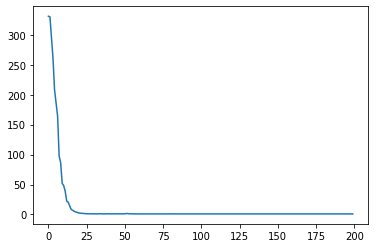

In [44]:
plt.plot(r.history['loss'],label='loss')

In [45]:
#get wieghts
model.layers

In [46]:
model.layers[0].get_weights()

[array([[0.33785635]], dtype=float32), array([17.772402], dtype=float32)]

In [47]:
a=model.layers[0].get_weights()[0][0,0]
a

0.33785635

In [48]:
# lets see if moore law was correct
np.log(2)/a

2.051603220662391

# which is almost 2 hence moore law proved